In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [187]:
#get data
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

#print data fields
train_data.head()
# Get the total number of features (columns) in the dataset
total_features = train_data.shape[1]
print(f'Total number of features: {total_features}')

# numerical and categorical features
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_data.select_dtypes(include=['object']).columns

print(numerical_features)

print(categorical_features)

Total number of features: 81
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtF

Question 2. 

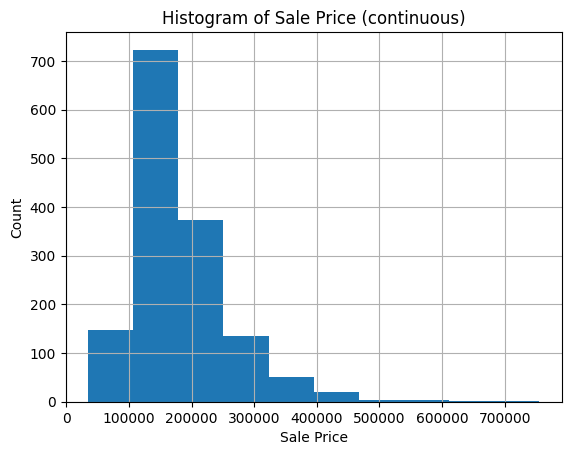

In [188]:
#continuous features
continuous_features = ['LotFrontage', 'LotArea', 'SalePrice']
#chooseonefeatureofeach type and plot the histogram to illustrate the distribution.
train_data['SalePrice'].hist()
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Histogram of Sale Price (continuous)')
plt.show()

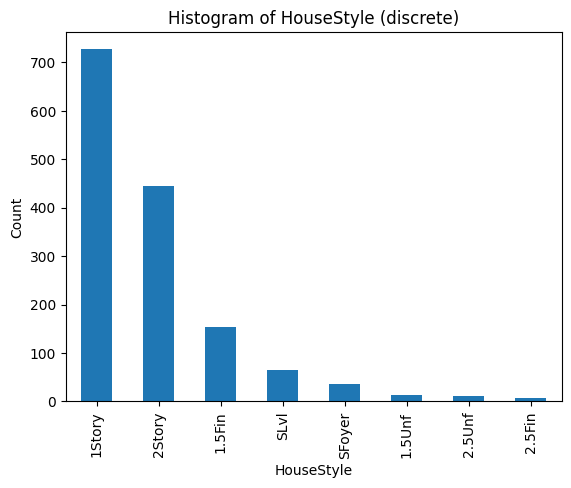

In [189]:
#discrete features
discrete_features = ['RoofStyle', 'HouseStyle', 'YearBuilt']
#chooseonefeatureofeach type and plot the histogram to illustrate the distribution.
train_data['HouseStyle'].value_counts().plot(kind='bar')
plt.title('Histogram of HouseStyle (discrete)')
plt.xlabel('HouseStyle')
plt.ylabel('Count')
plt.show()

Question 3 
Data Processing

In [190]:
#Step 1: Dealing with missing values

# check which are missing
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [191]:
# Alley           1369
# PoolQC          1453
# Fence           1179
# MiscFeature     1406

# These four features have high proportion of missing data, therefore dropped
train_data = train_data.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'])

# For features with less missing data
# for the numerical ones:
def missing_numerical(data, feature):
    data[feature] = data[feature].fillna(data[feature].median())
    return data

for feature in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
    train_data = missing_numerical(train_data, feature)
    test_data = missing_numerical(test_data, feature)
# for the categorical ones, fill in with the most frequent value:
def missing_categorical(data, feature):
    data[feature] = data[feature].fillna(data[feature].mode()[0])
    return data

for feature in ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_data = missing_categorical(train_data, feature)
    test_data = missing_categorical(test_data, feature)



In [192]:
# Step 2: normalizing numerical values
from sklearn.preprocessing import StandardScaler


numerical_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                      'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 
                      'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                      '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


scaler = StandardScaler()
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])


Question 4

Some features that should use a one-hot encoding are MSZoning, Street, Neighborhood, LotConfigue. These features are nomial. One category is not meaningfully "greater" than the other and there's no potential "ranking" or "order" between different values.

The following block uses the feature LandContour as an example.


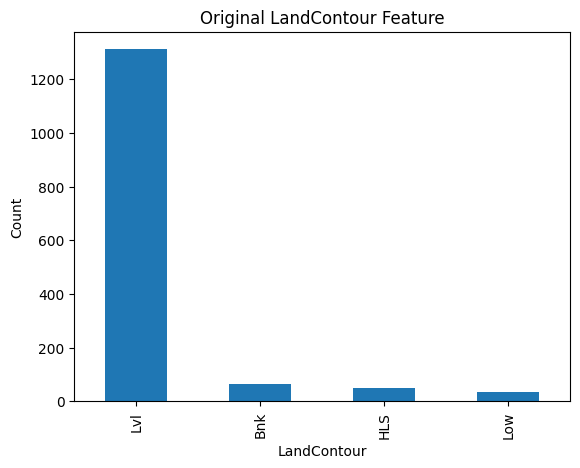

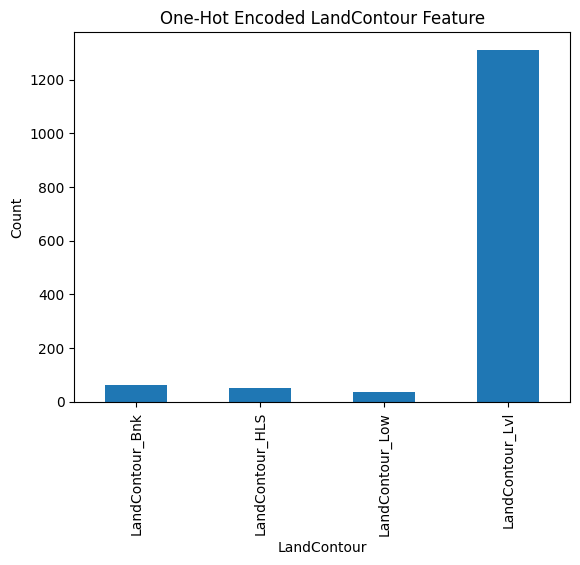

In [193]:
import matplotlib.pyplot as plt

train_data['LandContour'].value_counts().plot(kind='bar', title='Original LandContour Feature')
plt.xlabel('LandContour')
plt.ylabel('Count')
plt.show()

# OHE
landcontour_ohencoded = pd.get_dummies(train_data['LandContour'], prefix='LandContour')
train_data = pd.concat([train_data, landcontour_ohencoded], axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data['LandContour'], prefix='LandContour')], axis=1)
train_data = train_data.drop(columns=['LandContour'])
test_data = test_data.drop(columns=['LandContour'])

# VISUALIZATION

landcontour_ohencoded.sum().plot(kind='bar', title='One-Hot Encoded LandContour Feature')
plt.xlabel('LandContour')
plt.ylabel('Count')
plt.show()

In [194]:

ohe_cat_features = ['MSZoning', 'Street', 'LotShape', 'Utilities', 'LotConfig', 
                    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
                    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                    'Heating', 'CentralAir', 'Electrical', 'Functional', 'PavedDrive', 
                    'SaleType', 'SaleCondition', 'LandSlope','BsmtExposure', 'BsmtFinType1',
                    'BsmtFinType2', 'GarageType', 'GarageFinish']
train_data = pd.get_dummies(train_data, columns=ohe_cat_features, drop_first=True)
test_data = pd.get_dummies(test_data, columns=ohe_cat_features, drop_first=True)

In [195]:
# Unlike the ones above, the following features are ordinal
# for example, it could be that 'Ex' is better than 'Gd' which is better than 'TA' for exterior condition "ExterCond" 
# therefore Label Encoding might be more appropriate.
from sklearn.preprocessing import LabelEncoder
label_cat_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
                    'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'MasVnrType']

label_encoder = LabelEncoder()

for feature in label_cat_features:
    train_data[feature] = label_encoder.fit_transform(train_data[feature])
    test_data[feature] = label_encoder.fit_transform(test_data[feature])

Up until now we finished pre-processing data.

Question 5

In [196]:
from tabulate import tabulate

# JUSTIFICATION
# Initially I chose neighborhood-relevant features and condition-relevant features
neighborhood_columns = [col for col in train_data.columns if 'Neighborhood_' in col]
condition1_columns = [col for col in train_data.columns if 'Condition1_' in col]
condition2_columns = [col for col in train_data.columns if 'Condition2_' in col]
saletype_columns = [col for col in train_data.columns if 'SaleType_' in col]
salecondition_columns = [col for col in train_data.columns if 'SaleCondition_' in col]


# Living area is important for determining the price of a house on the market
# Newer houses are generally more expensive, hence the "YearBuilt" feature
features = ['GrLivArea', 'OverallQual', 'YearBuilt'] + neighborhood_columns + condition1_columns + condition2_columns

X = train_data[features].values
y = train_data['SalePrice'].values


# Iteration 1: 
# features = ['GrLivArea', 'OverallQual', 'YearBuilt'] + neighborhood_columns + condition1_columns + condition2_columns
# MSE: 1275116835.3176596
# RMSE: 35708.77812692083
# R-squared: 0.7978183638056677

# Mean SalePrice: 180921.19589041095
# Range of SalePrice: 34900 - 755000

# Adding more features to the model
# Iteration 2:
print(tabulate(train_data.head(), headers='keys', tablefmt='pretty'))
features = ['GrLivArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'BsmtFinSF1', 'LotArea'] + neighborhood_columns + condition1_columns + condition2_columns + saletype_columns + salecondition_columns
X = train_data[features].values
y = train_data['SalePrice'].values
# MSE: 987039834.6279665
# RMSE: 31417.190113502616
# R-squared: 0.843495652142064

# Mean SalePrice: 180921.19589041095
# Range of SalePrice: 34900 - 755000

# Iteration 3:
# More features, the better?
features = ['GrLivArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'BsmtFinSF1', 'LotArea', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond'] + neighborhood_columns + condition1_columns + condition2_columns + saletype_columns + salecondition_columns
X = train_data[features].values
y = train_data['SalePrice'].values
# MSE: 905941983.7673233
# RMSE: 30098.870141042225
# R-squared: 0.8563544708202474

# Mean SalePrice: 180921.19589041095
# Range of SalePrice: 34900 - 755000

# Compute the correlation matrix
corr_matrix = train_data.corr()

# Sort by the SalePrice correlation in descending order
sorted_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

# Convert sorted correlation into DataFrame for better tabulation
sorted_corr_df = pd.DataFrame(sorted_corr)

# Tabulate and print the sorted correlation DataFrame
print(tabulate(sorted_corr_df, headers='keys', tablefmt='pretty'))

+---+----+------------+----------------------+----------------------+-------------+-------------+-----------+--------------+------------+---------------------+-----------+-----------+----------+----------+----------------------+---------------------+----------------------+---------------------+-----------+-----------------------+---------------------+----------------------+----------------------+--------------+--------------+----------+----------+--------------+--------------+-------------+--------------+------------+-------------+----------------------+---------------------+-----------------------+------------+------------+---------------------+----------------------+---------------------+----------------------+---------------------+----------------------+----------------------+--------+--------+-----------+-----------------+-----------------+-----------------+-----------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------+--------

In [197]:
import numpy as np


X = train_data[features].apply(pd.to_numeric).values.astype(np.float64)

X = np.c_[np.ones(X.shape[0]), X]  

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_pred = X.dot(theta)

MSE = np.mean((y - y_pred) ** 2)
RMSE = np.sqrt(MSE)

# R^2
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2_score = 1 - (ss_residual / ss_total)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
print(f'MAPE: {mape}')
# Print MSE and R-squared
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R-squared: {r2_score}\n')
print(f"Mean SalePrice: {np.mean(y)}")
print(f"Range of SalePrice: {np.min(y)} - {np.max(y)}")

MAPE: 10.696125061954174
MSE: 905941983.7673233
RMSE: 30098.870141042225
R-squared: 0.8563544708202474

Mean SalePrice: 180921.19589041095
Range of SalePrice: 34900 - 755000


The features above are manually selected. I now try to do with correlations.

In [198]:
import numpy as np

# Select features that have a correlation of 0.3 or higher with SalePrice
cutoff = 0.1
strong_corr_features = corr_matrix[corr_matrix['SalePrice'].abs() >= cutoff].index

# drop SalePrice from the list of features
strong_corr_features = strong_corr_features.drop('SalePrice')
strong_corr_features = strong_corr_features.drop('RoofMatl_CompShg')

X = train_data[strong_corr_features].apply(pd.to_numeric).values.astype(np.float64)

X = np.c_[np.ones(X.shape[0]), X]  

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_pred = X.dot(theta)

MSE = np.mean((y - y_pred) ** 2)
RMSE = np.sqrt(MSE)

# R^2
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2_score = 1 - (ss_residual / ss_total)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
print(f'MAPE: {mape}')
# Print MSE and R-squared
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R-squared: {r2_score}\n')
print(f"Mean SalePrice: {np.mean(y)}")
print(f"Range of SalePrice: {np.min(y)} - {np.max(y)}")

MAPE: 10.474078099050043
MSE: 804078684.7772458
RMSE: 28356.281222636473
R-squared: 0.8725058444728709

Mean SalePrice: 180921.19589041095
Range of SalePrice: 34900 - 755000


In [199]:
X = test_data[strong_corr_features].apply(pd.to_numeric).values.astype(np.float64)

X = np.c_[np.ones(X.shape[0]), X]  

# theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_test_pred = X.dot(theta)

print(pd.isnull(y_test_pred).sum())
y_test_pred = pd.Series(y_test_pred).fillna(pd.Series(y_test_pred).median())
y_test_pred = y_test_pred.astype(float)
submission = pd.DataFrame({
    'Id': test_data['Id'],  # The Id from the test data
    'SalePrice': y_test_pred  # The predicted house prices
})

# save to the submission csv file
submission.to_csv('submission.csv', index=False)
print(submission.isnull().sum())

# # Format: Only save id and SalePrice columns
# submission = test_data[['Id']]
# submission['SalePrice'] = y_pred

# # Save the submission to a CSV file
# submission.to_csv('submission.csv', index=False)


3
Id           0
SalePrice    0
dtype: int64
